Tech Project 2 - Ensemble Methods

Diogo Pessoa


In [9]:
# data_file = 'combined_data.csv' # Load variable so data_loader can locale the csv filesystem path accordingly.
# %run data_loader.ipynb 

Data loaded:
- features: All features.
- label: label (views_log).
- x_train_sc: Scaled training features.
- x_test_sc: Scaled testing features.
- x_train - Training features.
- x_test - Testing features.
- y_train - Training labels.
- y_test - Testing labels.


discarded features: ['category_News & Politics' 'category_People & Blogs'
 'category_Pets & Animals' 'category_Trailers' 'publish_weekday_4']


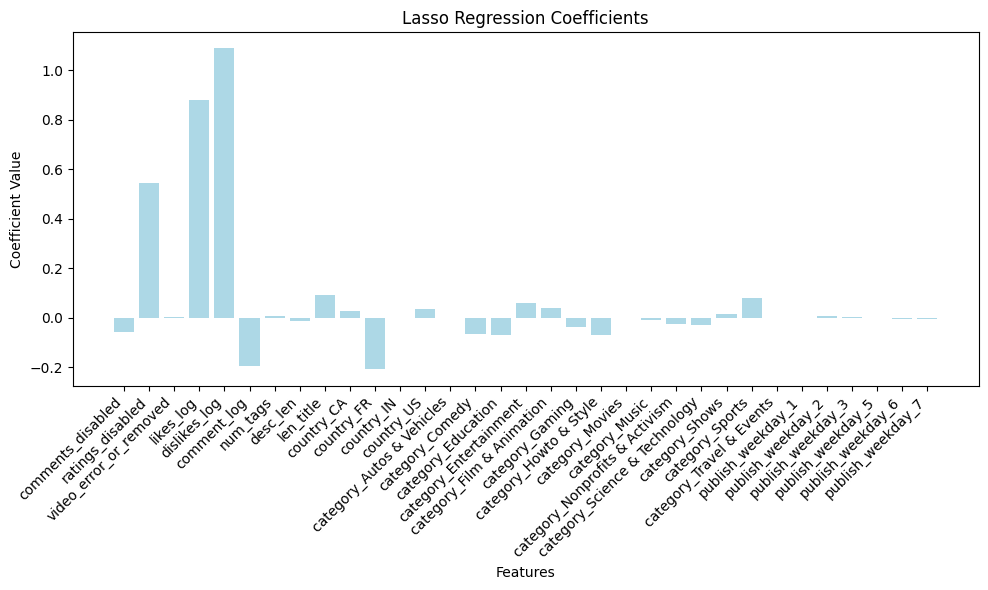

LassoCV Reduced Features to the training and testing features:
- x_train_reduced_sc: Scaled training features.
- x_test_reduced_sc: Scaled testing features.


In [11]:
# %run FeatureEngineering/LassoCV.ipynb

## Voting/Bagging Regressor

* [Voting Regressor](https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor)
* [Bagging Regressor](https://scikit-learn.org/stable/modules/ensemble.html#bagging-regressor)

Deliberately leaving RandomForestRegressor out of this test, since it was already used on initial notebook.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


n_estimators=200
rd_state=42

grad_boosting_regressor = GradientBoostingRegressor(random_state=rd_state, n_estimators=n_estimators)
kn_regressor = KNeighborsRegressor(n_neighbors=20, metric='euclidean')
bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=rd_state)

voting_regressor = VotingRegressor(estimators=[('gb', grad_boosting_regressor), ('knr', kn_regressor), ('br', bagging_regressor)])

In [13]:
import time
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

for b in [voting_regressor, bagging_regressor]:
  # Record the start time
  start_time = time.time()
  
  b.fit(x_train_reduced_sc, y_train)
  # Calculate the duration
  end_time = time.time()
  duration = end_time - start_time
  # Predict
  pred = b.predict(x_test_reduced_sc)
  # metrics
  mse = mean_squared_error(y_test, pred)
  r_two_score = r2_score(y_test, pred)
  ex_variance_score = explained_variance_score(y_test, pred)
  
  
  print(f"{b.__class__} training took {duration:.4f} seconds.")
  print(f'Mean Squared Error on Test Set: {mse:.4f}')
  print(f'r2 score: {r_two_score:.4f}')
  print(f'explained variance score: {ex_variance_score:.4f}')

<class 'sklearn.ensemble._voting.VotingRegressor'> training took 280.9033 seconds.
Mean Squared Error on Test Set: 0.2732
r2 score: 0.9175
explained variance score: 0.9176
<class 'sklearn.ensemble._bagging.BaggingRegressor'> training took 197.8389 seconds.
Mean Squared Error on Test Set: 0.1981
r2 score: 0.9402
explained variance score: 0.9402
